## Importing Libraries

In [93]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import warnings
warnings.filterwarnings("ignore")

## Loading the Data

In [2]:
# getting the raw data into a dataFrame
Data = pd.read_excel('Data.xlsx') 

## Data Preprocessing

In [3]:
# overview of the data
Data.head()

,Unnamed: 0,Name,Bedroom,Bathroom,Super_area,Carpet_area,Furnished_status,Car_parking,Water_availability,Floor,...,Availability_status,Locality,Age_of_construction,Overlooking,Facing,Monthly_charges,Brokerage,Tenant,Owner,Links
0,0,4 BHKFlat3000 sqft,4.0,4,3000.0,2094.0,Semi-Furnished,None,NaN,15Â (Out of 40 Floors)\n,...,NaN,Mulund,New Construction,Garden/Park,North,NaN,"â‚¹ 75,000",Bachelors,NaN,https://www.magicbricks.com/propertyDetails/4-...
1,1,1 BHKFlat620 sqft,1.0,2,620.0,425.0,Unfurnished,None,24 Hours Available,5Â (Out of 7 Floors)\n,...,Immediately AvailableÂ,Mulund,5 to 10 years,"Garden/Park, Main Road",North - East,NaN,Others,Family,NaN,https://www.magicbricks.com/propertyDetails/1-...
2,2,4 BHKFlat1800 sqft,4.0,4,1800.0,1375.0,Semi-Furnished,2 Covered,24 Hours Available,32Â (Out of 40 Floors)\n,...,Immediately AvailableÂ,Mulund,New Construction,"Garden/Park, Pool, Main Road",West,"â‚¹ 30,000","â‚¹ 1,12,500",Family,Agent,https://www.magicbricks.com/propertyDetails/4-...
3,3,3 BHKFlat1848 sqft,3.0,3,1848.0,1320.0,Semi-Furnished,1 Covered,24 Hours Available,22Â (Out of 40 Floors)\n,...,Immediately AvailableÂ,Mulund,Less than 5 years,Garden/Park,North - East,NaN,No brokerage,Family,Agent,https://www.magicbricks.com/propertyDetails/3-...
4,4,3 BHKFlat1400 sqft,3.0,3,1400.0,980.0,Unfurnished,None,24 Hours Available,NaN,...,Immediately AvailableÂ,Mulund,New Construction,NaN,North - East,NaN,NaN,Bachelors,Agent,https://www.magicbricks.com/propertyDetails/3-...


In [4]:
# taking a look at the coloumns 
pd.DataFrame(Data.columns)

,0
0,Unnamed: 0
1,Name
2,Bedroom
3,Bathroom
4,Super_area
5,Carpet_area
6,Furnished_status
7,Car_parking
8,Water_availability
9,Floor


In [5]:
# taking a look at rows and elemnts 
Data.shape , Data.size

((666, 22), 14652)

In [6]:
# making a working dataframe 
df = Data.copy()

In [7]:
# getting an over view of the copy dataframe
df.head()

,Unnamed: 0,Name,Bedroom,Bathroom,Super_area,Carpet_area,Furnished_status,Car_parking,Water_availability,Floor,...,Availability_status,Locality,Age_of_construction,Overlooking,Facing,Monthly_charges,Brokerage,Tenant,Owner,Links
0,0,4 BHKFlat3000 sqft,4.0,4,3000.0,2094.0,Semi-Furnished,None,NaN,15Â (Out of 40 Floors)\n,...,NaN,Mulund,New Construction,Garden/Park,North,NaN,"â‚¹ 75,000",Bachelors,NaN,https://www.magicbricks.com/propertyDetails/4-...
1,1,1 BHKFlat620 sqft,1.0,2,620.0,425.0,Unfurnished,None,24 Hours Available,5Â (Out of 7 Floors)\n,...,Immediately AvailableÂ,Mulund,5 to 10 years,"Garden/Park, Main Road",North - East,NaN,Others,Family,NaN,https://www.magicbricks.com/propertyDetails/1-...
2,2,4 BHKFlat1800 sqft,4.0,4,1800.0,1375.0,Semi-Furnished,2 Covered,24 Hours Available,32Â (Out of 40 Floors)\n,...,Immediately AvailableÂ,Mulund,New Construction,"Garden/Park, Pool, Main Road",West,"â‚¹ 30,000","â‚¹ 1,12,500",Family,Agent,https://www.magicbricks.com/propertyDetails/4-...
3,3,3 BHKFlat1848 sqft,3.0,3,1848.0,1320.0,Semi-Furnished,1 Covered,24 Hours Available,22Â (Out of 40 Floors)\n,...,Immediately AvailableÂ,Mulund,Less than 5 years,Garden/Park,North - East,NaN,No brokerage,Family,Agent,https://www.magicbricks.com/propertyDetails/3-...
4,4,3 BHKFlat1400 sqft,3.0,3,1400.0,980.0,Unfurnished,None,24 Hours Available,NaN,...,Immediately AvailableÂ,Mulund,New Construction,NaN,North - East,NaN,NaN,Bachelors,Agent,https://www.magicbricks.com/propertyDetails/3-...


In [8]:
# dropping a few columns
df.drop(['Unnamed: 0' , 'Links' , 'Name'] , axis = 1 , inplace = True)

In [9]:
# finding nan / null values in each column
df.isnull().sum()

Bedroom                  1
Bathroom                 0
Super_area               9
Carpet_area             62
Furnished_status         0
Car_parking              0
Water_availability     176
Floor                   73
Rent                     0
Security_deposit        66
Availability_status    175
Locality                 0
Age_of_construction     34
Overlooking            127
Facing                  77
Monthly_charges        527
Brokerage              203
Tenant                 300
Owner                  317
dtype: int64

### Bedroom

In [10]:
# checking for the categories in the bedroom  
print('count of each bedrooms :\n{}'.format(df['Bedroom'].value_counts()))

# removing null values in bedroom 
# as this is a discrete variable median is the best option to go with 

print('\nNumber of null value before : {}'.format(df['Bedroom'].isnull().sum()))
df['Bedroom'].fillna(df['Bedroom'].median() , inplace = True)
print('Number of null value after : {}'.format(df['Bedroom'].isnull().sum()))



count of each bedrooms :
2.0    321
1.0    165
3.0    160
4.0     19
Name: Bedroom, dtype: int64

Number of null value before : 1
Number of null value after : 0


In [11]:
# removing null values in Super_area
# in this case the mean and median are almost the same thus chosing median is a better option

print('Number of null value before : {}'.format(df['Super_area'].isnull().sum()))
df['Super_area'].fillna(df['Super_area'].median() , inplace = True)
print('Number of null value after : {}'.format(df['Super_area'].isnull().sum()))

Number of null value before : 9
Number of null value after : 0


In [12]:
# removing null values in Carpet_area
# in this case the mean and median have a difference of 50 which makes a great amount of difference in pricing thus mean would be a better option 

print('Number of null value before : {}'.format(df['Carpet_area'].isnull().sum()))
df['Carpet_area'].fillna(df['Carpet_area'].mean() , inplace = True)
print('Number of null value after : {}'.format(df['Carpet_area'].isnull().sum()))

Number of null value before : 62
Number of null value after : 0


In [13]:
# removing null values in Water_availability
# generally When water availability when not mentioned is considerd as the place not having 24 hrs running water 
# thus we can either create a new category of not mentioned or go with mode 
# but as u can see in value counts there is only 1 entry of 12 hrs water , so if we create a new category  
# the data may be baised more towards 24 hrs and not mentioned category and the model wont have enough points to train on 12 hrs water supply 
# aslo domain knowledge says that a minimum of 12 hrs water suppply is a complusion in areas mentioned above 
# Thus we replace the nan values with 12 hrs

print('Number of null value before : {}'.format(df['Water_availability'].isnull().sum()))
df['Water_availability'].fillna('12 Hours Available', inplace = True)
print('Number of null value after : {}'.format(df['Water_availability'].isnull().sum()))

Number of null value before : 176
Number of null value after : 0


In [14]:
# removing null values in floor
floor = []
df['Floor'] = df['Floor'].astype('str')

for each in df['Floor'] :
    if 'Upper' in each :
        x = each.split()
        for each_char in x :
            if each_char.isnumeric() == True:
                floor.append(int(each_char))
                
    elif 'GroundÂ'  in each or 'Lower' in each :
        floor.append(0)
    
    elif 'nan' in each :
        floor.append(None)
        
    else :
        each = each.split('Â')
        floor.append(int(each[0]))
        

# droping and replacing the dataframe 
df.drop(['Floor'] , axis = 1 , inplace = True) 
df['Floor'] = pd.DataFrame(floor)

print('Number of null value before : {}'.format(df['Floor'].isnull().sum()))
df['Floor'].fillna(df['Floor'].median() , inplace = True )
print('Number of null value after : {}'.format(df['Floor'].isnull().sum()))

Number of null value before : 73
Number of null value after : 0


In [15]:
# removing null values in Security_deposit and making it numerical as well 

# all nan values to be replaced with zero first
df['Security_deposit'].fillna(0, inplace = True)

# cleaing the data and making it numerical 
# special cases need to addressed spearately 

Security_deposit = []
for each in df['Security_deposit']:
    if each ==  '2.5 Lac' :
        Security_deposit.append('250000')
    
    elif each == 'â‚¹ 1' :
        Security_deposit.append('1') 
    
    elif each == '2.0 Lac' :
        Security_deposit.append('200000')
    
    elif each == 0 :
        Security_deposit.append(str(each)) 
        
    else :
        each = each.split()
        Security_deposit.append(str(each[1])) 
    


security_deposit = []
for each in Security_deposit :
    security_deposit.append(''.join(each.split(',')))

#droping and replacding the DataFrame
df.drop(['Security_deposit']  , axis = 1, inplace = True)    
df['Security_deposit'] = pd.DataFrame(security_deposit)

# as the data in the DataFrame is string type we need to convert it into numberic type 
df['Security_deposit'] = df['Security_deposit'].astype('int32')

In [16]:
# removing null values in Availability_status
# if the Availability_status is not mentioned it is obvious that the place is not ready as of yet to be rented 
# thus another category of Immediately Not Available is replace where there is nan 


# replacing the null values 
print('Number of null value before : {}'.format(df['Availability_status'].isnull().sum()))
df['Availability_status'].fillna('Immediately Not Available', inplace = True)
print('Number of null value after : {}'.format(df['Availability_status'].isnull().sum()))

# making the category more readable
Availability_status = []
for each in df['Availability_status'] :
    if each != 'Immediately Not Available' :
        Availability_status.append(each[:-2])
    else :
        Availability_status.append(each)

#droping and replacding the DataFrame
df.drop(['Availability_status'] , axis = 1 , inplace = True)
df['Availability_status'] = pd.DataFrame(Availability_status)

Number of null value before : 175
Number of null value after : 0


In [17]:
# removing the null values in Age_of_construction
# going by the domain knowlegde in this case ... 
# Generally when the age of the building is not mentioned we assume it to be a new construction or less than 5 years
# here as most of the building are in the less than 5 years category (mode) we replace the null values with this category 

# replacing the null values 
print('Number of null value before : {}'.format(df['Age_of_construction'].isnull().sum()))
df['Age_of_construction'].fillna(df['Age_of_construction'].value_counts().index[0], inplace = True)
print('Number of null value after : {}'.format(df['Age_of_construction'].isnull().sum()))

Number of null value before : 34
Number of null value after : 0


In [18]:
#removing the null values in Overlooking

Overlooking = []
df['Overlooking'] = df['Overlooking'].astype('str')
for each in df['Overlooking'] :
    each = each.split(',')
    Overlooking.append(each[0])
    
# droping and replacing the overlooking DataFrame
df.drop(['Overlooking'] , axis = 1 , inplace = True)
df['Overlooking'] = pd.DataFrame(Overlooking).astype('str')

# replacing the nan value with a new category of not mentioned as we cannot assume the view of the place 
df['Overlooking'].replace('nan' , 'Not Mentioned' , inplace=True)

In [19]:
# removing null values in Facing
# replacing the nan value with a new category of not mentioned as we cannot assume the Facing of the place 

print('Number of null value before : {}'.format(df['Facing'].isnull().sum()))
df['Facing'].fillna('Not Mentioned', inplace = True)
print('Number of null value after : {}'.format(df['Facing'].isnull().sum()))

Number of null value before : 77
Number of null value after : 0


In [20]:
# Monthly_charges
# mothly chareges are additional chareges to be added to the brokerage thus replacing the nan value with zero

df['Monthly_charges'] = df['Monthly_charges'].astype('str')

Monthly_charges = []
for each in df['Monthly_charges'] :
    if each == 'nan' :
        Monthly_charges.append('0')
    
    elif each == '100' :
        Monthly_charges.append('100')
               
    elif each == '2500' :
        Monthly_charges.append('2500')
    
    elif each == '5800' :
        Monthly_charges.append('5800')
        
    elif each == '3000' :
        Monthly_charges.append('3000')
        
    else :
        each = each.split()
        Monthly_charges.append(each[1])
        

# making the values more numeric 
monthly_charges = []
for each in Monthly_charges :
    monthly_charges.append(''.join(each.split(',')))

# droping and replacing the monthly charges
df.drop(['Monthly_charges'] , axis = 1 , inplace = True)
df['Monthly_charges'] = pd.DataFrame(monthly_charges).astype('int32')

In [21]:
# Brokerage
# brokerage is a one time charge thus replacing the nan value with zero

df['Brokerage'] = df['Brokerage'].astype('str')

Brokerage = []
for each in df['Brokerage'] :
    if each == 'nan' or each == 'Others' or each == 'No brokerage':
        Brokerage.append('0')
         
    else :
        each = each.split()
        Brokerage.append(each[1])
        
        
# making the values more numeric 
brokerage = []
for each in Brokerage :
    brokerage.append(''.join(each.split(',')))


# droping and replacing the monthly charges
df.drop(['Brokerage'] , axis = 1 , inplace = True)
df['Brokerage'] = pd.DataFrame(brokerage).astype('int32')

In [22]:
# removing the null values in Tenant
# When nothing is mentioned , we assume that both family and bachelors are allowed 
# thus we replace null values with a new category 

print('Number of null value before : {}'.format(df['Tenant'].isnull().sum()))
df['Tenant'].fillna('Family / Bachelors ', inplace = True)
print('Number of null value after : {}'.format(df['Tenant'].isnull().sum()))

Number of null value before : 300
Number of null value after : 0


In [23]:
# removing the null values in Owner
# generally a agent is there to handle all the rent bussiness 
# thus we replace null values with agent (mode) 

print('Number of null value before : {}'.format(df['Owner'].isnull().sum()))
df['Owner'].fillna(df['Owner'].value_counts().index[0], inplace = True)
print('Number of null value after : {}'.format(df['Owner'].isnull().sum()))

Number of null value before : 317
Number of null value after : 0


In [24]:
# cleaning the scrapped data of Rent column

df['Rent'] = df['Rent'].astype('str')

rent = []
for each in df['Rent'] :
    if 'â‚¹' in each :
        each = each.split()
        rent.append(each[1])
    elif 'Lac' in each :
        each = each.split()
        rent.append(each[0].replace('.' , '')+'0000')
        
    else :
        rent.append(each)
        


Rent = []
for each in rent :
    Rent.append(''.join(each.split(',')))

#dropping and replacing the Rent data
df.drop(['Rent'] , axis = 1 , inplace = True)
df['Rent'] = pd.DataFrame(Rent).astype('int32')

In [25]:
# removing and Car_parking

open_parking = []
covered_parking = []
df['Car_parking'] = df['Car_parking'].astype('str')

for each in df['Car_parking'] :

    if 'Covered' in each and 'Open' in each :
        each = each.split()
        covered_parking.append(int(each[0]))
        open_parking.append(int(each[2]))
          
        
    elif 'Open' in each :
        each = each.split()
        open_parking.append(int(each[0]))
        covered_parking.append(0)
        
    elif 'Covered' in each :
        each = each.split()
        open_parking.append(0)
        covered_parking.append(int(each[0]))
        
    if 'None' in each :
        open_parking.append(0)
        covered_parking.append(0) 

df['covered_parking'] = pd.DataFrame(covered_parking)

df['open_parking'] = pd.DataFrame(open_parking)

df.drop(['Car_parking'] , axis = 1 , inplace = True)

In [26]:
# final Dataframe after all cleaning and replacing null values 
df

,Bedroom,Bathroom,Super_area,Carpet_area,Furnished_status,Water_availability,Locality,Age_of_construction,Facing,Tenant,Owner,Floor,Security_deposit,Availability_status,Overlooking,Monthly_charges,Brokerage,Rent,covered_parking,open_parking
0,4.0,4,3000.0,2094.000000,Semi-Furnished,12 Hours Available,Mulund,New Construction,North,Bachelors,Agent,15.0,500000,Immediately Not Available,Garden/Park,0,75000,75000,0,0
1,1.0,2,620.0,425.000000,Unfurnished,24 Hours Available,Mulund,5 to 10 years,North - East,Family,Agent,5.0,100000,Immediately Available,Garden/Park,0,0,25000,0,0
2,4.0,4,1800.0,1375.000000,Semi-Furnished,24 Hours Available,Mulund,New Construction,West,Family,Agent,32.0,500000,Immediately Available,Garden/Park,30000,112500,75000,2,0
3,3.0,3,1848.0,1320.000000,Semi-Furnished,24 Hours Available,Mulund,Less than 5 years,North - East,Family,Agent,22.0,250000,Immediately Available,Garden/Park,0,0,75000,1,0
4,3.0,3,1400.0,980.000000,Unfurnished,24 Hours Available,Mulund,New Construction,North - East,Bachelors,Agent,7.0,0,Immediately Available,Not Mentioned,0,0,45000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,1.0,2,780.0,600.000000,Unfurnished,12 Hours Available,Ghatkopar,Above 20 years,North - East,Bachelors,Agent,3.0,100000,Immediately Not Available,Garden/Park,1500,30000,30000,0,0
662,2.0,2,1850.0,745.571192,Semi-Furnished,12 Hours Available,Ghatkopar,Less than 5 years,Not Mentioned,Family / Bachelors,Owner,9.0,0,Immediately Not Available,Not Mentioned,0,0,110000,0,0
663,2.0,2,1200.0,745.571192,Furnished,12 Hours Available,Ghatkopar,Less than 5 years,East,Family / Bachelors,Owner,9.0,0,Immediately Not Available,Main Road,0,0,65000,1,0
664,4.0,3,2000.0,745.571192,Unfurnished,12 Hours Available,Ghatkopar,5 to 10 years,North - East,Family / Bachelors,Agent,20.0,0,Immediately Not Available,Main Road,0,0,120000,1,0


In [27]:
df.isnull().sum()

Bedroom                0
Bathroom               0
Super_area             0
Carpet_area            0
Furnished_status       0
Water_availability     0
Locality               0
Age_of_construction    0
Facing                 0
Tenant                 0
Owner                  0
Floor                  0
Security_deposit       0
Availability_status    0
Overlooking            0
Monthly_charges        0
Brokerage              0
Rent                   0
covered_parking        0
open_parking           0
dtype: int64

## Exploratory Data Analysis(EDA)

### Bedroom 

In [28]:
# number of categories in bedroom
df['Bedroom'].value_counts()

2.0    322
1.0    165
3.0    160
4.0     19
Name: Bedroom, dtype: int64

In [29]:
# 5 point summary 
df['Bedroom'].describe()

count    666.000000
mean       2.049550
std        0.774951
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Bedroom, dtype: float64

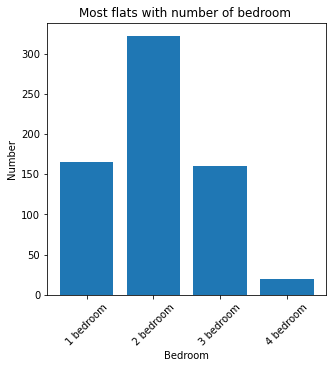

In [30]:
plt.figure(figsize=(5,5))
plt.bar(x = df['Bedroom'].value_counts().index , height= df['Bedroom'].value_counts().values )
plt.xlabel('Bedroom')
plt.xticks(ticks = [1,2,3,4] , labels=['1 bedroom' ,'2 bedroom' , '3 bedroom','4 bedroom'] , rotation = 45 )
plt.ylabel('Number')
plt.title('Most flats with number of bedroom ')
plt.show()

    # below graph show that the most number of 2 bedroom flats available for rent whereas the 4 bedroom are the least available flats in these areas

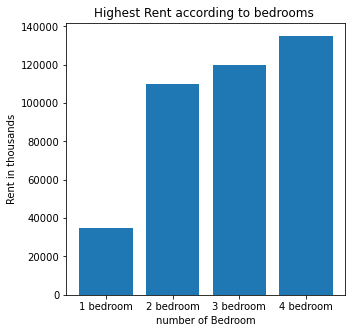

In [31]:
# chart showing highest rent bedroom wise 
plt.figure(figsize=(5,5))
plt.bar(df['Bedroom'] , df['Rent'])
plt.xlabel('number of Bedroom')
plt.xticks(ticks = [1,2,3,4] , labels=['1 bedroom' ,'2 bedroom' , '3 bedroom','4 bedroom'] )
plt.ylabel('Rent in thousands')
plt.title('Highest Rent according to bedrooms ')
plt.show()

# thus we can observe here that the highest rent in our dataset is of house with 4 bedrooms.

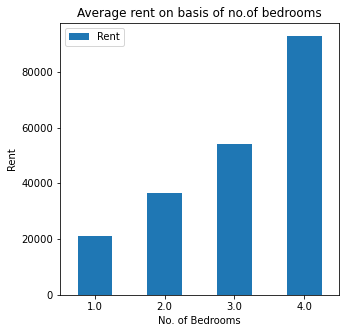

In [32]:
# using horizontal bar chart to average rent of house on basis of no. of bedrooms. 
x=df[['Rent','Bedroom']]
y=x.set_index('Bedroom')
z=y.groupby('Bedroom').mean()
z.plot(kind='bar', figsize=(5,5))
plt.xlabel('No. of Bedrooms') # label of X-axis.
plt.xticks(rotation='horizontal') 
plt.ylabel('Rent') # label of Y-axis.
plt.title('Average rent on basis of no.of bedrooms') # to give title of the bar chart.
plt.show()

# Thus we can observe that the average rent of house with 4 bedrooms is highest as expected.

### Bathroom 

In [33]:
# number of categories in bedroom
df['Bathroom'].value_counts()

2    446
3    117
1     88
4     12
5      2
6      1
Name: Bathroom, dtype: int64

In [34]:
# 5 point summary 
df['Bathroom'].describe()

count    666.000000
mean       2.094595
std        0.650090
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        6.000000
Name: Bathroom, dtype: float64

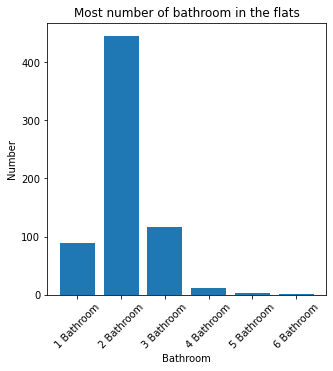

In [35]:

plt.figure(figsize=(5,5))
plt.bar(x = df['Bathroom'].value_counts().index , height= df['Bathroom'].value_counts().values )
plt.xlabel('Bathroom')
plt.xticks(ticks = [1,2,3,4,5,6 ] , labels=['1 Bathroom' ,'2 Bathroom' , '3 Bathroom','4 Bathroom' , '5 Bathroom' , '6 Bathroom'] , rotation = 45 )
plt.ylabel('Number')
plt.title('Most number of bathroom in the flats')
plt.show()

# As it is evidently seen that there are more flats with 2 bathrooms 
# This also Compliments the the above graph that of number of 2 bedroom flats being more the these areas. 

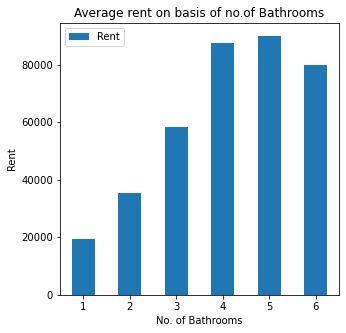

In [36]:
# using horizontal bar chart to find the average rent of house on basis of no. of bathrooms. 
x=df[['Rent','Bathroom']]
y=x.set_index('Bathroom')
z=y.groupby('Bathroom').mean()
z.plot(kind='bar', figsize=(5,5))
plt.xlabel('No. of Bathrooms') # label of X-axis.
plt.xticks(rotation='horizontal') 
plt.ylabel('Rent') # label of Y-axis.
plt.title('Average rent on basis of no.of Bathrooms') # to give title of the bar chart.
plt.show()

# Thus we can observe that the average rent of house with 5 bathrooms is highest rather than rent with 6 bathrooms.

### Super_area 

In [37]:
# 5 point summary 
df['Super_area'].describe()

count     666.000000
mean     1049.478979
std       435.911718
min       100.000000
25%       716.250000
50%      1000.000000
75%      1228.750000
max      3250.000000
Name: Super_area, dtype: float64

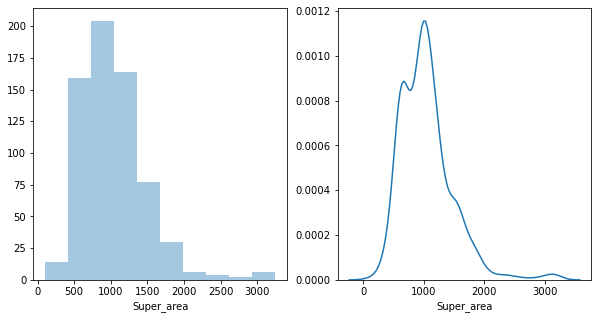

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['Super_area'] , kde = False , bins = 10)

plt.subplot(1,2,2)
sns.distplot(df['Super_area'] , hist = False )

plt.show()

# what is super area -> It is the total area of your flat plus the areas Covered under build up area  
# below two are the graph conveying the same message but in a different way 
# the below graphs tell us that the distribution of the super area of the flats in these area is positively skewed 
# suggesting that maximum flats are concenterated around super area as 500 sqft to 1500 sqft

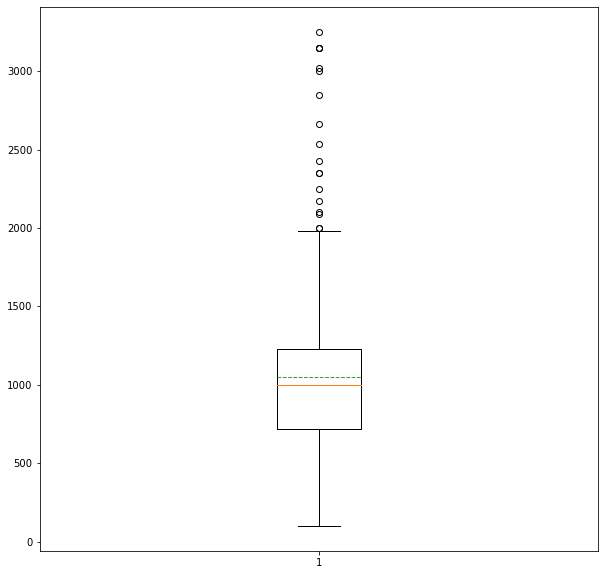

In [39]:
plt.figure(figsize=(10,10))
plt.boxplot(df['Super_area'] , meanline=True , showmeans=True,)
plt.show()

### Carpet_area 

In [40]:
# 5 point summary 
df['Carpet_area'].describe()

count     666.000000
mean      745.571192
std       277.177563
min       180.000000
25%       565.750000
50%       727.000000
75%       805.000000
max      2200.000000
Name: Carpet_area, dtype: float64

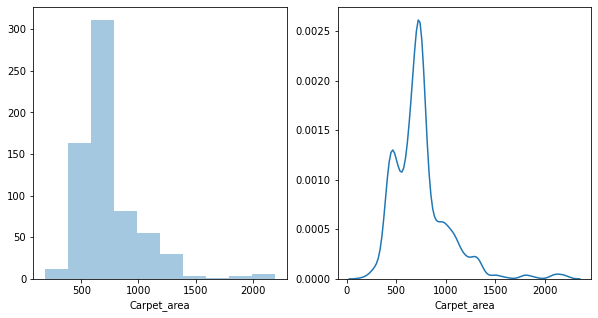

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['Carpet_area'] , kde = False , bins = 10)

plt.subplot(1,2,2)
sns.distplot(df['Carpet_area'] , hist = False)
plt.show()

# below two are the graph conveying the same message but in a different way 
# the below graphs tell us that the distribution of the carpet area of the flats in these area is positively skewed 
# suggesting that maximum flats are concenterated around 500 sqft to 800 sqft

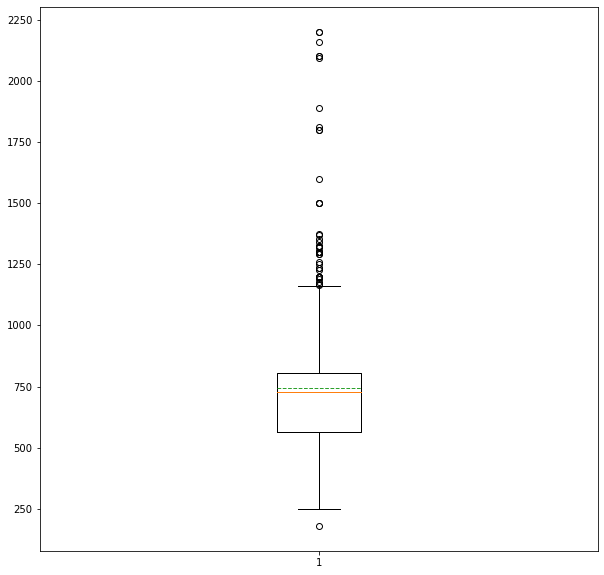

In [42]:
plt.figure(figsize=(10,10))
plt.boxplot(df['Carpet_area'] , meanline=True , showmeans=True,)
plt.show()

### Furnished_status

In [43]:
df['Furnished_status'].value_counts()

Semi-Furnished    325
Unfurnished       250
Furnished          91
Name: Furnished_status, dtype: int64

In [44]:
# 5 point summary 
df['Furnished_status'].describe()

count                666
unique                 3
top       Semi-Furnished
freq                 325
Name: Furnished_status, dtype: object

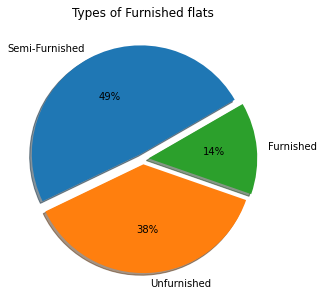

In [45]:
plt.figure(figsize=(5,5))
plt.pie(df['Furnished_status'].value_counts().values , labels = df['Furnished_status'].value_counts().index , startangle=30 , explode=(0.05,0.05,0.05) , autopct='%1.f%%' , shadow=True  )
plt.title('Types of Furnished flats')
plt.show()

# the followiing pie gives us better idea that a large chunck of flats are semi - furnished.
# also tells us that the least number of flats are furnished

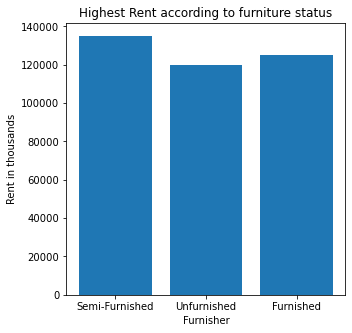

In [46]:
#finding highest rent according to furnished status.
plt.figure(figsize=(5,5))
plt.bar(df['Furnished_status'] , df['Rent'])
plt.xlabel('Furnisher')
plt.ylabel('Rent in thousands')
plt.title('Highest Rent according to furniture status')
plt.show()

# The highest rent is our dataset is of semi-furnished flat.

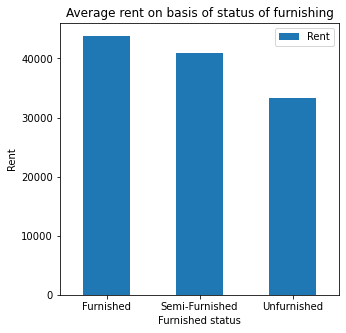

In [47]:
# using horizontal bar chart to average rent of house on basis of status of furnishing. 
x=df[['Rent','Furnished_status']]
y=x.set_index('Furnished_status')
z=y.groupby('Furnished_status').mean()
z.plot(kind='bar', figsize=(5,5))
plt.xlabel('Furnished status') # label of X-axis.
plt.xticks(rotation='horizontal') 
plt.ylabel('Rent') # label of Y-axis.
plt.title('Average rent on basis of status of furnishing') # to give title of the bar chart.
plt.show()

# Thus we can observe that the average rent of furnished flats is highest, followed by semi-furnished and unfurnished.

### Water_availability

In [48]:
df['Water_availability'].value_counts()

24 Hours Available    489
12 Hours Available    177
Name: Water_availability, dtype: int64

In [49]:
# 5 point summary 
df['Water_availability'].describe()

count                    666
unique                     2
top       24 Hours Available
freq                     489
Name: Water_availability, dtype: object

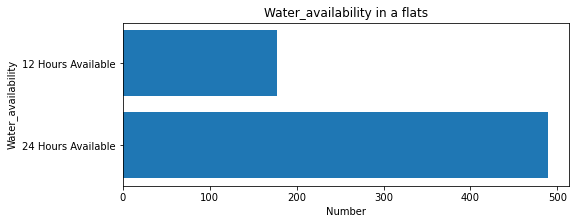

In [50]:
plt.figure(figsize=(8,3))
plt.barh(y = df['Water_availability'].value_counts().index , width= df['Water_availability'].value_counts().values )
plt.ylabel('Water_availability')
plt.xlabel('Number')
plt.title('Water_availability in a flats')
plt.show()

# from this we get a better understanding that most of the flats available have 24 hrs water available to the flats 

### Locality

In [51]:
df['Locality'].value_counts()

Mulund       188
Thane        172
Ghatkopar    170
Bhandup      136
Name: Locality, dtype: int64

In [52]:
# 5 point summary 
df['Locality'].describe()

count        666
unique         4
top       Mulund
freq         188
Name: Locality, dtype: object

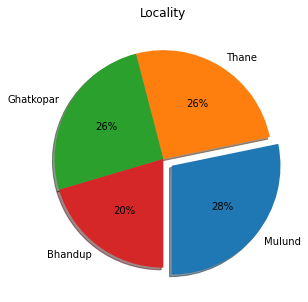

In [53]:
plt.figure(figsize=(5,5))
plt.pie(df['Locality'].value_counts().values , labels = df['Locality'].value_counts().index , startangle=270 , explode=(0.1,0,0,0) , autopct='%1.f%%' , shadow=True  )
plt.title('Locality')
plt.show()

# most of the flats in this data are of the locality Mulund 
# but as you can see there isnt much difference between them as they are approximately equally distributed

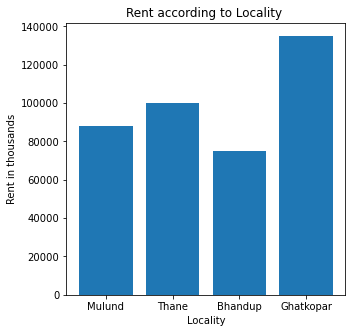

In [54]:
#Finding highest rent in each locality
plt.figure(figsize=(5,5))
plt.bar(df['Locality'] , df['Rent'])
plt.xlabel('Locality')
plt.ylabel('Rent in thousands')
plt.title('Rent according to Locality ')
plt.show()

# thus we can observe here that highest rent in our dataset is of house located at ghatkopar where as the least amount is paid in bhandup. 

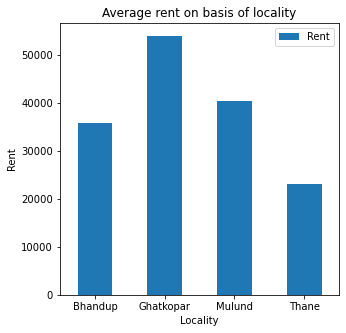

In [55]:
# using horizontal bar chart to average rent of house on basis of locality. 
x=df[['Rent','Locality']]
y=x.set_index('Locality')
z=y.groupby('Locality').mean()
z.plot(kind='bar', figsize=(5,5))
plt.xlabel('Locality') # label of X-axis.
plt.xticks(rotation='horizontal') 
plt.ylabel('Rent') # label of Y-axis.
plt.title('Average rent on basis of locality') # to give title of the bar chart.
plt.show()
# Thus, average rent is higher in Ghatkopar, followed by Mulund, Bhandup and Thane.

### Age_of_construction

In [56]:
df['Age_of_construction'].value_counts()

Less than 5 years    254
5 to 10 years        140
New Construction     134
10 to 15 years        60
Above 20 years        50
15 to 20 years        28
Name: Age_of_construction, dtype: int64

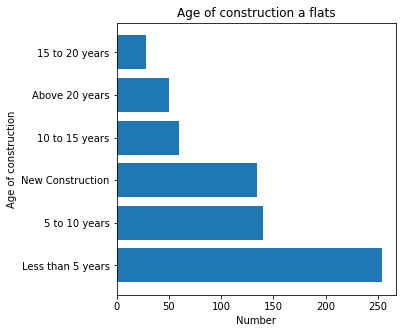

In [57]:
plt.figure(figsize=(5,5))
plt.barh(y = df['Age_of_construction'].value_counts().index , width= df['Age_of_construction'].value_counts().values )
plt.ylabel('Age of construction')
plt.xlabel('Number')
plt.title('Age of construction a flats')
plt.show()

# As these areas are developing exponentially, therefore as expected most of the building must be new 
# the following graph supports this claim as you see that most buliding are less than 5 years old 

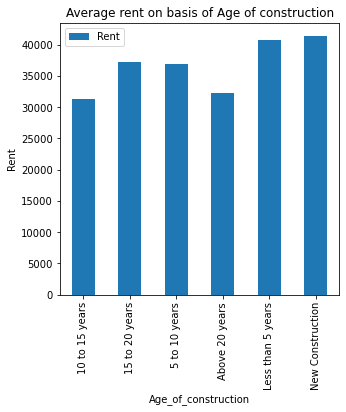

In [58]:
# using horizontal bar chart to average rent of house on basis of age of construction. 
x=df[['Rent','Age_of_construction']]
y=x.set_index('Age_of_construction')
z=y.groupby('Age_of_construction').mean()
z.plot(kind='bar', figsize=(5,5))
plt.xlabel('Age_of_construction') # label of X-axis.
plt.xticks(rotation='vertical') 
plt.ylabel('Rent') # label of Y-axis.
plt.title('Average rent on basis of Age of construction') # to give title of the bar chart.
plt.show()

# The average rent is higher among flats with new construction, followed by less than 5 years.

### Facing

In [59]:
df['Facing'].value_counts()

East             317
North - East     125
Not Mentioned     77
North             50
West              41
North - West      33
South              9
South - East       8
South -West        6
Name: Facing, dtype: int64

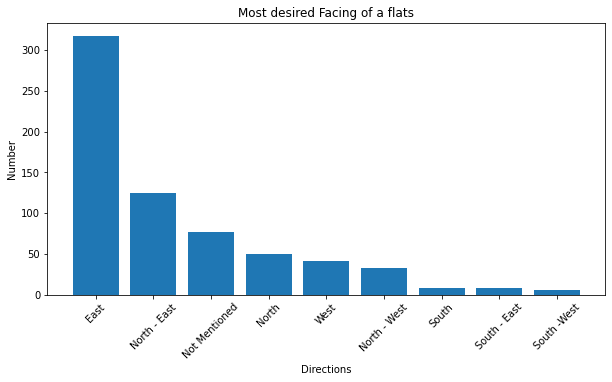

In [60]:
plt.figure(figsize=(10,5))
plt.bar(x = df['Facing'].value_counts().index , height= df['Facing'].value_counts().values )
plt.xlabel('Directions')
plt.xticks( rotation = 45 )
plt.ylabel('Number')
plt.title('Most desired Facing of a flats')
plt.show()

# As this being India ,most of the people are supersitious while renting or buying houses 
# The most common belief is that the flat entry facing in the north direction is considered lucky 
# But as you see in the following graph most of the flats are facing east 
# the question that arises is Facing a factor in deciding the rent of the flat ?

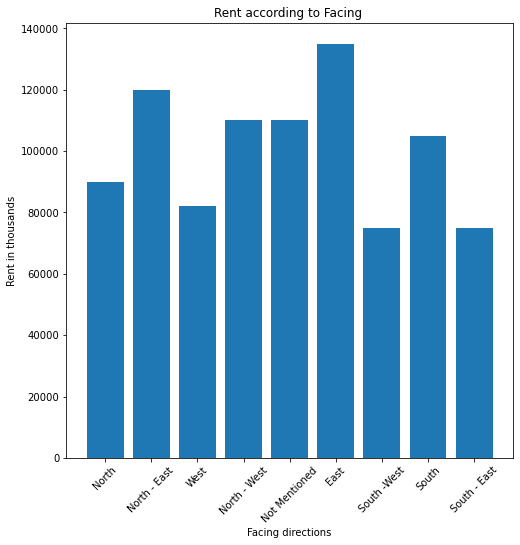

In [61]:
plt.figure(figsize=(8,8))
plt.bar(df['Facing'] , df['Rent'])
plt.xlabel('Facing directions')
plt.xticks(rotation = 45)
plt.ylabel('Rent in thousands')
plt.title('Rent according to Facing ')
plt.show()

#Highest rent in our dataset is of flat facing East.


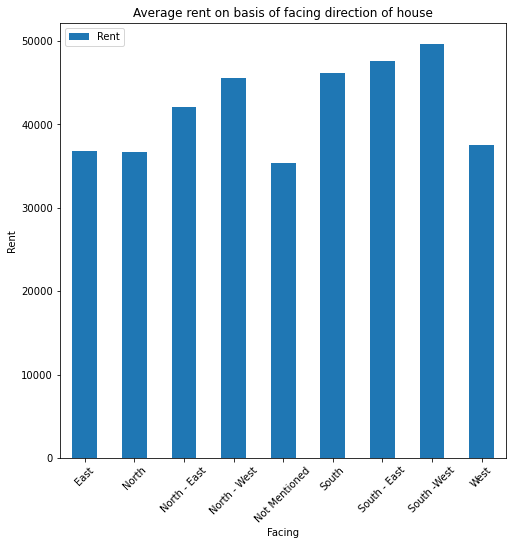

In [62]:
# using horizontal bar chart to average rent of house on basis of status of furnishing. 
x=df[['Rent','Facing']]
y=x.set_index('Facing')
z=y.groupby('Facing').mean()
z.plot(kind='bar', figsize=(8,8))
plt.xlabel('Facing') # label of X-axis.
plt.xticks(rotation='45') 
plt.ylabel('Rent') # label of Y-axis.
plt.title('Average rent on basis of facing direction of house') # to give title of the bar chart.
plt.show()
# so contrary to popular belief the rent also seems to be higher in south-west facing flats 
# well to take a positive note from this is lets just say people have stopped believing in superstitions 
# or well they have no choice afterall when it comes to choosing between less rent or facing of the flat 

### Tenant

In [63]:
df['Tenant'].value_counts()

Family / Bachelors     300
Bachelors              209
Family                 157
Name: Tenant, dtype: int64

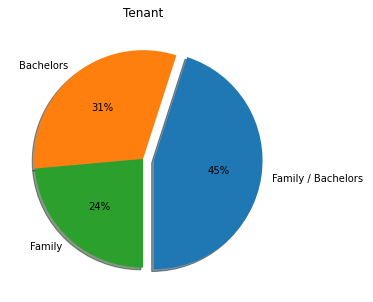

In [64]:
plt.figure(figsize=(5,5))
plt.pie(df['Tenant'].value_counts().values , labels = df['Tenant'].value_counts().index , startangle=270 , explode=(0.1,0,0) , autopct='%1.f%%' , shadow=True  )
plt.title('Tenant')
plt.show()

# most of the owners have no preference over whom the flat is rented to 
# whereas least amount of people prefer family 

### Owner

In [65]:
df['Owner'].value_counts()

Agent    527
Owner    139
Name: Owner, dtype: int64

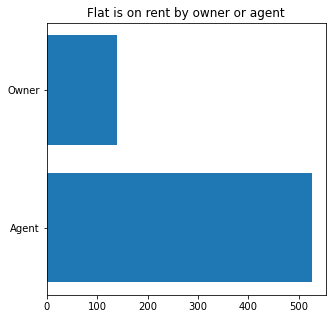

In [66]:
plt.figure(figsize=(5,5))
plt.barh(y = df['Owner'].value_counts().index , width= df['Owner'].value_counts().values )
plt.title('Flat is on rent by owner or agent')
plt.show()

# most of the flats are under the control of agents as it is common practice 

### Floor

In [67]:
df['Floor'].describe()

count    666.000000
mean       8.861862
std        6.615463
min        0.000000
25%        4.000000
50%        7.000000
75%       12.000000
max       35.000000
Name: Floor, dtype: float64

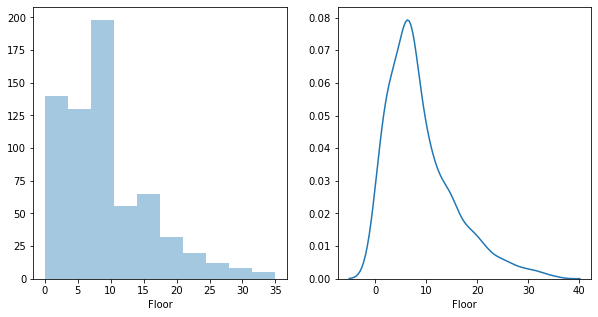

In [68]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['Floor'] , kde = False , bins = 10)

plt.subplot(1,2,2)
sns.distplot(df['Floor'] , hist = False)
plt.show()

# below two are the graph conveying the same message but in a different way 
# the below graphs tell us that the distribution of the floor on which the flats are in these area is positively skewed 
# suggesting that maximum flats are concenterated around 5 to 8 floors

### Availability_status

In [69]:
df['Availability_status'].value_counts()

Immediately Available        491
Immediately Not Available    175
Name: Availability_status, dtype: int64

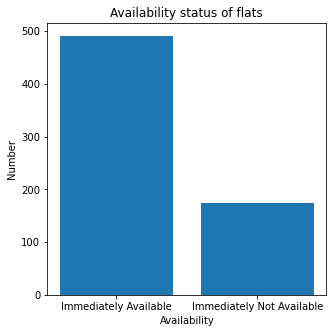

In [70]:
plt.figure(figsize=(5,5))
plt.bar(x = df['Availability_status'].value_counts().index , height= df['Availability_status'].value_counts().values )
plt.xlabel('Availability')
plt.ylabel('Number')
plt.title('Availability status of flats')
plt.show()

# most of the flats are immediately available 

### Overlooking

In [71]:
df['Overlooking'].value_counts()

Garden/Park      367
Main Road        148
Not Mentioned    127
Pool              24
Name: Overlooking, dtype: int64

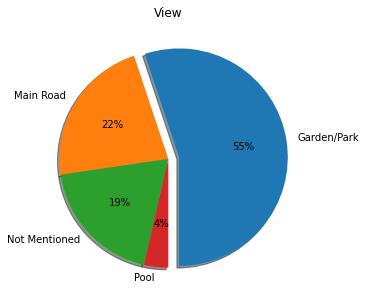

In [72]:
plt.figure(figsize=(5,5))
plt.pie(df['Overlooking'].value_counts().values , labels = df['Overlooking'].value_counts().index , startangle=270 , explode=(0.1,0,0,0) , autopct='%1.f%%' , shadow=True  )
plt.title('View')
plt.show()

# a lot of people desire a great view to look at when they wake up in the morning thus overlooking play a factor in choosing a place
# As it is seen that most of the flats have a garden/park view to the flats 

### Rent

In [73]:
df['Rent'].describe()

count       666.000000
mean      38485.222222
std       19777.890659
min        3500.000000
25%       25000.000000
50%       35000.000000
75%       47000.000000
max      135000.000000
Name: Rent, dtype: float64

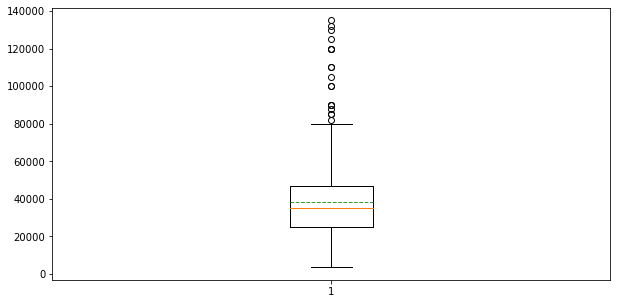

In [74]:
plt.figure(figsize=(10,5))
plt.boxplot(df['Rent'] , meanline=True , showmeans=True)
plt.show()

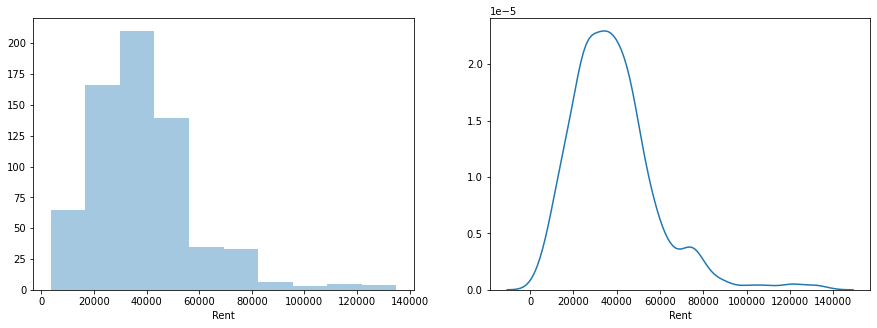

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['Rent'] , kde = False , bins = 10)

plt.subplot(1,2,2)
sns.distplot(df['Rent'] , hist = False)

plt.show()
#The below graphs tell us that the distribution of the Rent of the flats in these area is positively skewed 
#Suggesting that maximum Rent of flats are concentrated around Rs. 25,000 to Rs. 50,000.


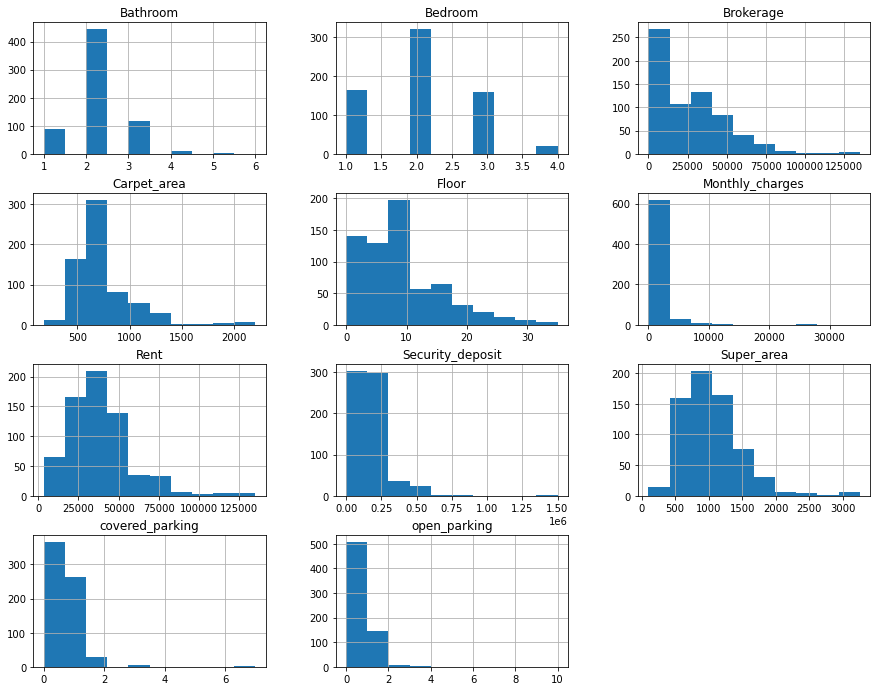

In [76]:
df.hist(layout=(5,3),figsize=(15,15))
plt.show()

#### creating  a checkpoint for data

In [77]:
# df.to_excel('Clean_and_imputed_data' , engine='xlsxwriter')
df.to_csv("Clean_data.csv")

In [80]:
ls

 Clean_data.csv      'Model Generator rough.ipynb'  'Web Scarpping'/
 Data.xlsx            Rent_Prediction.ipynb
'linkedin post.JPG'   synopsis.txt


In [81]:
# Import the clean daata
old_df = pd.read_csv('Clean_data.csv')

# Separating the categorical columns
numeric_df = old_df._get_numeric_data()
categorical_df = old_df[list(set(old_df.columns) - set(numeric_df.columns))]

# Encoding the categorical columns
new_Tenant =  pd.get_dummies(categorical_df['Tenant'], drop_first = True,prefix='Tenant')
new_Locality =  pd.get_dummies(categorical_df['Locality'], drop_first = True,prefix='Locality')
new_Furnished_status =  pd.get_dummies(categorical_df['Furnished_status'], drop_first = True,prefix='Furnished_status')
new_Availability_status =  pd.get_dummies(categorical_df['Availability_status'], drop_first = True,prefix='Availability_status')
new_Overlooking =  pd.get_dummies(categorical_df['Overlooking'], drop_first = True,prefix='Overlooking')
new_Age_of_construction =  pd.get_dummies(categorical_df['Age_of_construction'], drop_first = True,prefix='Age_of_construction')
new_Water_availability =  pd.get_dummies(categorical_df['Water_availability'], drop_first = True,prefix='Water_availability')
new_Facing =  pd.get_dummies(categorical_df['Facing'], drop_first = True,prefix='Facing')
new_Owner =  pd.get_dummies(categorical_df['Owner'], drop_first = True,prefix='Owner')
new_categorical_df = pd.concat([new_Tenant , new_Locality , new_Furnished_status , new_Availability_status , new_Overlooking , new_Age_of_construction , new_Water_availability , new_Facing , new_Owner ] , axis = 1)

# Combining the numerical and encoded categorical columns into a single dataframe 
df = pd.concat([numeric_df, new_categorical_df], axis=1)

# dropping unwanted columns
df.drop(['Unnamed: 0'] , axis = 1 , inplace = True)

df

,Bedroom,Bathroom,Super_area,Carpet_area,Floor,Security_deposit,Monthly_charges,Brokerage,Rent,covered_parking,...,Water_availability_24 Hours Available,Facing_North,Facing_North - East,Facing_North - West,Facing_Not Mentioned,Facing_South,Facing_South - East,Facing_South -West,Facing_West,Owner_Owner
0,4.0,4,3000.0,2094.000000,15.0,500000,0,75000,75000,0,...,0,1,0,0,0,0,0,0,0,0
1,1.0,2,620.0,425.000000,5.0,100000,0,0,25000,0,...,1,0,1,0,0,0,0,0,0,0
2,4.0,4,1800.0,1375.000000,32.0,500000,30000,112500,75000,2,...,1,0,0,0,0,0,0,0,1,0
3,3.0,3,1848.0,1320.000000,22.0,250000,0,0,75000,1,...,1,0,1,0,0,0,0,0,0,0
4,3.0,3,1400.0,980.000000,7.0,0,0,0,45000,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,1.0,2,780.0,600.000000,3.0,100000,1500,30000,30000,0,...,0,0,1,0,0,0,0,0,0,0
662,2.0,2,1850.0,745.571192,9.0,0,0,0,110000,0,...,0,0,0,0,1,0,0,0,0,1
663,2.0,2,1200.0,745.571192,9.0,0,0,0,65000,1,...,0,0,0,0,0,0,0,0,0,1
664,4.0,3,2000.0,745.571192,20.0,0,0,0,120000,1,...,0,0,1,0,0,0,0,0,0,0


## Detecting and removing Outliers

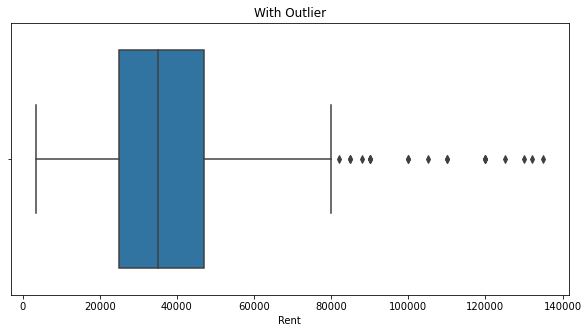

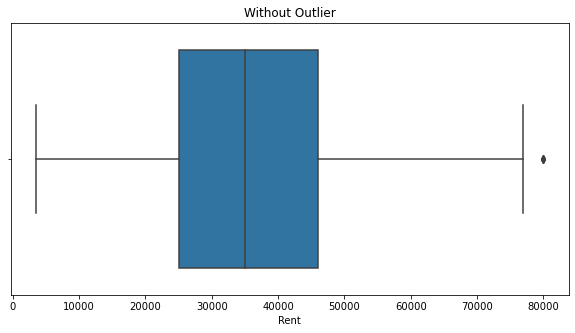

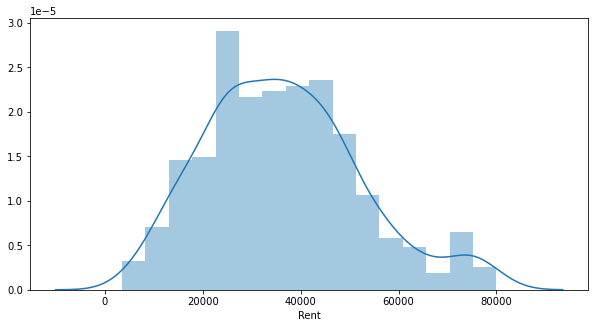

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('With Outlier')
sns.boxplot(x=df['Rent'])
plt.show()

# identifying the quantile range 
Q1 = df['Rent'].quantile(0.25)
Q3 = df['Rent'].quantile(0.75)
IQR = Q3 - Q1

# removing the outlier range 
df = df[~((df['Rent'] < (Q1 - 1.5 * IQR)) |(df['Rent'] > (Q3 + 1.5 * IQR)))]

# after removing the outlier
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Without Outlier')
sns.boxplot(x=df['Rent'])
plt.show()

# Distribution on rent 
plt.figure(figsize=(10,5))
sns.distplot(df['Rent']);
plt.show()

# VIF Calculation

In [83]:
# Separating the categorical columns
numeric_df = df[['Bedroom','Bathroom','Super_area','Carpet_area','Floor','Security_deposit','Monthly_charges','Brokerage','covered_parking','open_parking','Rent']]
categorical_df = df[list(set(df.columns) - set(numeric_df.columns))]

y_vif = numeric_df[['Rent']]
x_vif = numeric_df.drop(['Rent'] , axis = 1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_vif.values, i) for i in range(x_vif.shape[1])]
vif["features"] = x_vif.columns
vif

,VIF Factor,features
0,33.645739,Bedroom
1,25.493332,Bathroom
2,56.942795,Super_area
3,50.122125,Carpet_area
4,3.326258,Floor
5,4.276277,Security_deposit
6,1.159670,Monthly_charges
7,2.969845,Brokerage
8,2.111868,covered_parking
9,1.248515,open_parking


#### When VIF is greater than 5,  there is an indication that multicollinearity may be present. However when VIF s greater than 10, there is high multicollinearity. In the above case we can see that there is high multicollinearity between some variables. Hence, removing such features with high multicollinearity.

## Spliting the Data into Train and Test 

In [84]:
# Assigning the Target variable and response variable 
y = df[['Rent']]
X = df.drop(['Rent','Bedroom','Bathroom','Super_area','Carpet_area'] , axis = 1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# standardizing the x features 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
MinMax_scalar = MinMaxScaler()
X_train = MinMax_scalar.fit_transform(X_train)
X_test = MinMax_scalar.transform(X_test)


## Multiple Linear Regression

In [85]:
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.linear_model import LinearRegression

# Fitting Multiple Linear Regression to the Training set
Multiple_regressor = LinearRegression()
Multiple_regressor.fit(X_train, y_train)

#prediciting the values of both train and test using the model 
MLR_y_train_pred = Multiple_regressor.predict(X_train)
MLR_y_test_pred = Multiple_regressor.predict(X_test)


# training and testing RMSE
MLR_Train_RMSE = np.sqrt(mean_squared_error(y_train , MLR_y_train_pred))
MLR_Test_RMSE = np.sqrt(mean_squared_error(y_test , MLR_y_test_pred))

# R-square score
MLR_r2 = r2_score(y_test , MLR_y_test_pred)

# Displaying the value 
print('R_SQUARE_score is {}'.format(MLR_r2))
print()
print('Training RMSE is {}'.format(MLR_Train_RMSE))
print('Testing RMSE is {}'.format(MLR_Test_RMSE))

R_SQUARE_score is 0.6711802132768386

Training RMSE is 8892.631669535182
Testing RMSE is 9554.303026068523


## Ridge Regressor 

In [86]:
y = df[['Rent']]
X = df.drop(['Rent','Bedroom','Bathroom','Super_area','Carpet_area'] , axis = 1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# standardizing the x features 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
MinMax_scalar = MinMaxScaler()
X_train = MinMax_scalar.fit_transform(X_train)
X_test = MinMax_scalar.transform(X_test)

from sklearn.linear_model import Ridge
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error

Ridge_regressor = Ridge(alpha=0.05)
Ridge_regressor.fit(X_train , y_train)

#prediciting the values of both train and test using the model 
Ridge_y_train_pred = Ridge_regressor.predict(X_train)
Ridge_y_test_pred = Ridge_regressor.predict(X_test)

# training and testing RMSE
Ridge_Train_RMSE = np.sqrt(mean_squared_error(y_train , Ridge_y_train_pred))
Ridge_Test_RMSE = np.sqrt(mean_squared_error(y_test , Ridge_y_test_pred))

# R-square score
Ridge_r2 = r2_score(y_test , Ridge_y_test_pred)

# Displaying the value 
print('R_SQUARE_score is {}'.format(Ridge_r2))
print()
print('Training RMSE is {}'.format(Ridge_Train_RMSE))
print('Testing RMSE is {}'.format(Ridge_Test_RMSE))

R_SQUARE_score is 0.6696706698785727

Training RMSE is 8893.054515707736
Testing RMSE is 9576.20882476932


## Lasso Regressor

In [87]:
y = df[['Rent']]
X = df.drop(['Rent','Bedroom','Bathroom','Super_area','Carpet_area'] , axis = 1)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# standardizing the x features 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
MinMax_scalar = MinMaxScaler()
X_train = MinMax_scalar.fit_transform(X_train)
X_test = MinMax_scalar.transform(X_test)

from sklearn.linear_model import Lasso
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error

# training the model
Lasso_regressor = Lasso(alpha=0.05)
Lasso_regressor.fit(X_train , y_train)

#prediciting the values of both train and test using the model 
Lasso_y_train_pred = Lasso_regressor.predict(X_train)
Lasso_y_test_pred = Lasso_regressor.predict(X_test)


# training and testing RMSE
Lasso_Train_RMSE = np.sqrt(mean_squared_error(y_train , Lasso_y_train_pred))
Lasso_Test_RMSE = np.sqrt(mean_squared_error(y_test , Lasso_y_test_pred))

# R-square score
Lasso_r2 = r2_score(y_test , Lasso_y_test_pred)

# Displaying the value 
print('R_SQUARE_score is {}'.format(Lasso_r2))
print()
print('Training RMSE is {}'.format(Lasso_Train_RMSE))
print('Testing RMSE is {}'.format(Lasso_Test_RMSE))

R_SQUARE_score is 0.6712057662820994

Training RMSE is 8892.631846184231
Testing RMSE is 9553.931780315286


## DecisionTree Regression 

In [88]:
y = df[['Rent']]
X = df.drop(['Rent','Bedroom','Bathroom','Super_area','Carpet_area'] , axis = 1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# standardizing the x features 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
MinMax_scalar = MinMaxScaler()
X_train = MinMax_scalar.fit_transform(X_train)
X_test = MinMax_scalar.transform(X_test)

from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error

# Training the model
DecisionTree_regressor = DecisionTreeRegressor(criterion = 'mae' , random_state = 0 , max_depth= 4 )  
DecisionTree_regressor.fit(X_train, y_train) 

#prediciting the values of both train and test using the model 
DecisionTree_y_train_pred = DecisionTree_regressor.predict(X_train)
DecisionTree_y_test_pred = DecisionTree_regressor.predict(X_test)

# training and testing RMSE
DecisionTree_Train_RMSE = np.sqrt(mean_squared_error(y_train , DecisionTree_y_train_pred))
DecisionTree_Test_RMSE = np.sqrt(mean_squared_error(y_test , DecisionTree_y_test_pred))

# R-square score
DecisionTree_r2 = r2_score(y_test , DecisionTree_y_test_pred)

# Displaying the value 
print('R_SQUARE_score is {}'.format(DecisionTree_r2))
print()
print('Training RMSE is {}'.format(DecisionTree_Train_RMSE))
print('Testing RMSE is {}'.format(DecisionTree_Test_RMSE))

R_SQUARE_score is 0.8141189654040054

Training RMSE is 7535.723533007909
Testing RMSE is 7183.524548023155


# RandomForest Regression

In [89]:
y = df[['Rent']]
X = df.drop(['Rent','Bedroom','Bathroom','Super_area','Carpet_area'] , axis = 1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# standardizing the x features 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
MinMax_scalar = MinMaxScaler()
X_train = MinMax_scalar.fit_transform(X_train)
X_test = MinMax_scalar.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import r2_score , mean_squared_error 

# Training the model
RandomForest_regressor = RandomForestRegressor( max_depth = 4)  
RandomForest_regressor.fit(X_train, y_train) 

#prediciting the values of both train and test using the model 
RandomForest_y_train_pred = RandomForest_regressor.predict(X_train)
RandomForest_y_test_pred = RandomForest_regressor.predict(X_test)

# training and testing RMSE
RandomForest_Train_RMSE = np.sqrt(mean_squared_error(y_train , RandomForest_y_train_pred))
RandomForest_Test_RMSE = np.sqrt(mean_squared_error(y_test , RandomForest_y_test_pred))

# R-square score
RandomForest_r2 = r2_score(y_test , RandomForest_y_test_pred)

# Displaying the value 
print('R_SQUARE_score is {}'.format(RandomForest_r2))
print()
print('Training RMSE is {}'.format(RandomForest_Train_RMSE))
print('Testing RMSE is {}'.format(RandomForest_Test_RMSE))

R_SQUARE_score is 0.8142705560863669

Training RMSE is 6272.072682115135
Testing RMSE is 7180.594777649861


# Model Comparison

In [90]:
Techniques_list             = pd.DataFrame( [ 'MLR'          , 'Ridge'           , 'Lasso'          , 'Decision Tree'         , 'Random Forest'          ] , columns=['Techniques'])
R2_list                     = pd.DataFrame( [ MLR_r2         , Ridge_r2          , Lasso_r2         , DecisionTree_r2         , RandomForest_r2          ] , columns=['R2']         )
Train_RMSE_list             = pd.DataFrame( [ MLR_Train_RMSE , Ridge_Train_RMSE  , Lasso_Train_RMSE , DecisionTree_Train_RMSE , RandomForest_Train_RMSE  ] , columns=['Train RMSE'] )
Test_RMSE_list              = pd.DataFrame( [ MLR_Test_RMSE  , Ridge_Test_RMSE   , Lasso_Test_RMSE  , DecisionTree_Test_RMSE  , RandomForest_Test_RMSE   ] , columns=['Test RMSE']  )

Test_Train_difference_list  = pd.DataFrame( [ (MLR_Test_RMSE - MLR_Train_RMSE) , (Ridge_Test_RMSE - Ridge_Train_RMSE)  , (Lasso_Test_RMSE - Lasso_Train_RMSE) , (DecisionTree_Test_RMSE - DecisionTree_Train_RMSE) , (RandomForest_Test_RMSE - RandomForest_Train_RMSE)] , columns=['Difference'])

Model_comparision_df = pd.concat([Techniques_list, R2_list , Train_RMSE_list , Test_RMSE_list , Test_Train_difference_list ] , axis = 1)

In [91]:
Model_comparision_df.set_index(['Techniques'])

,R2,Train RMSE,Test RMSE,Difference
Techniques,,,,
MLR,0.671180,8892.631670,9554.303026,661.671357
Ridge,0.669671,8893.054516,9576.208825,683.154309
Lasso,0.671206,8892.631846,9553.931780,661.299934
Decision Tree,0.814119,7535.723533,7183.524548,-352.198985
Random Forest,0.814271,6272.072682,7180.594778,908.522096


In [92]:
Model_comparision_df.sort_values(['R2'])

,Techniques,R2,Train RMSE,Test RMSE,Difference
1,Ridge,0.669671,8893.054516,9576.208825,683.154309
0,MLR,0.671180,8892.631670,9554.303026,661.671357
2,Lasso,0.671206,8892.631846,9553.931780,661.299934
3,Decision Tree,0.814119,7535.723533,7183.524548,-352.198985
4,Random Forest,0.814271,6272.072682,7180.594778,908.522096


- The least difference between testing and training RMSE score is that of decision tree 
- Whereas it also has a r square value of 0.814 which is a good r square value 


In [95]:
joblib.dump(RandomForest_regressor , "RandomForest_regressor,pkl")

['RandomForest_regressor,pkl']

In [103]:
X

,Floor,Security_deposit,Monthly_charges,Brokerage,covered_parking,open_parking,Tenant_Family,Tenant_Family / Bachelors,Locality_Ghatkopar,Locality_Mulund,...,Water_availability_24 Hours Available,Facing_North,Facing_North - East,Facing_North - West,Facing_Not Mentioned,Facing_South,Facing_South - East,Facing_South -West,Facing_West,Owner_Owner
0,15.0,500000,0,75000,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,5.0,100000,0,0,0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
2,32.0,500000,30000,112500,2,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,22.0,250000,0,0,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
4,7.0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,5.0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
660,7.0,300000,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
661,3.0,100000,1500,30000,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
663,9.0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


# Testing the model 

In [96]:
model = joblib.load("RandomForest_regressor,pkl")

In [ ]:
x_val = []
x_val